# 📺 YouTube Trending Video Analysis (Canada)

This project analyzes trending YouTube videos in Canada using data from Kaggle.

## 🎯 Objectives

- Identify the most frequent trending **video categories**
- Analyze **average views** by category
- Analyze **average likes** by category
- Detect whether **disabled comments** play a role in video performance or not
- Highlight channels that appear most often in trending

Dataset source: [Kaggle YouTube Trending Dataset](https://www.kaggle.com/datasets/datasnaek/youtube-new)


In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
file_path = "CAvideos.csv"
yt_data = pd.read_csv(file_path)

In [3]:
#checking the data
yt_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [4]:

#creating a dict for mapping category_id to category name from the json file

category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}


yt_data['category'] = yt_data['category_id'].map(category_mapping)

In [5]:
yt_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


### 🔍 Analysis Sections:

In [6]:
category_counts = yt_data['category'].value_counts()
category_counts

category
Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Movies                      6
Name: count, dtype: int64

In [7]:
category_counts = category_counts.reset_index()
category_counts.columns = ['Category','Trending_videos']
category_counts

,Category,Trending_videos
0,Entertainment,13451
1,News & Politics,4159
2,People & Blogs,4105
3,Comedy,3773
4,Music,3731
5,Sports,2787
6,Film & Animation,2060
7,Howto & Style,2007
8,Gaming,1344
9,Science & Technology,1155


<Axes: title={'center': 'Most popular category among the trending videos'}, xlabel='Category', ylabel='Trending_videos'>

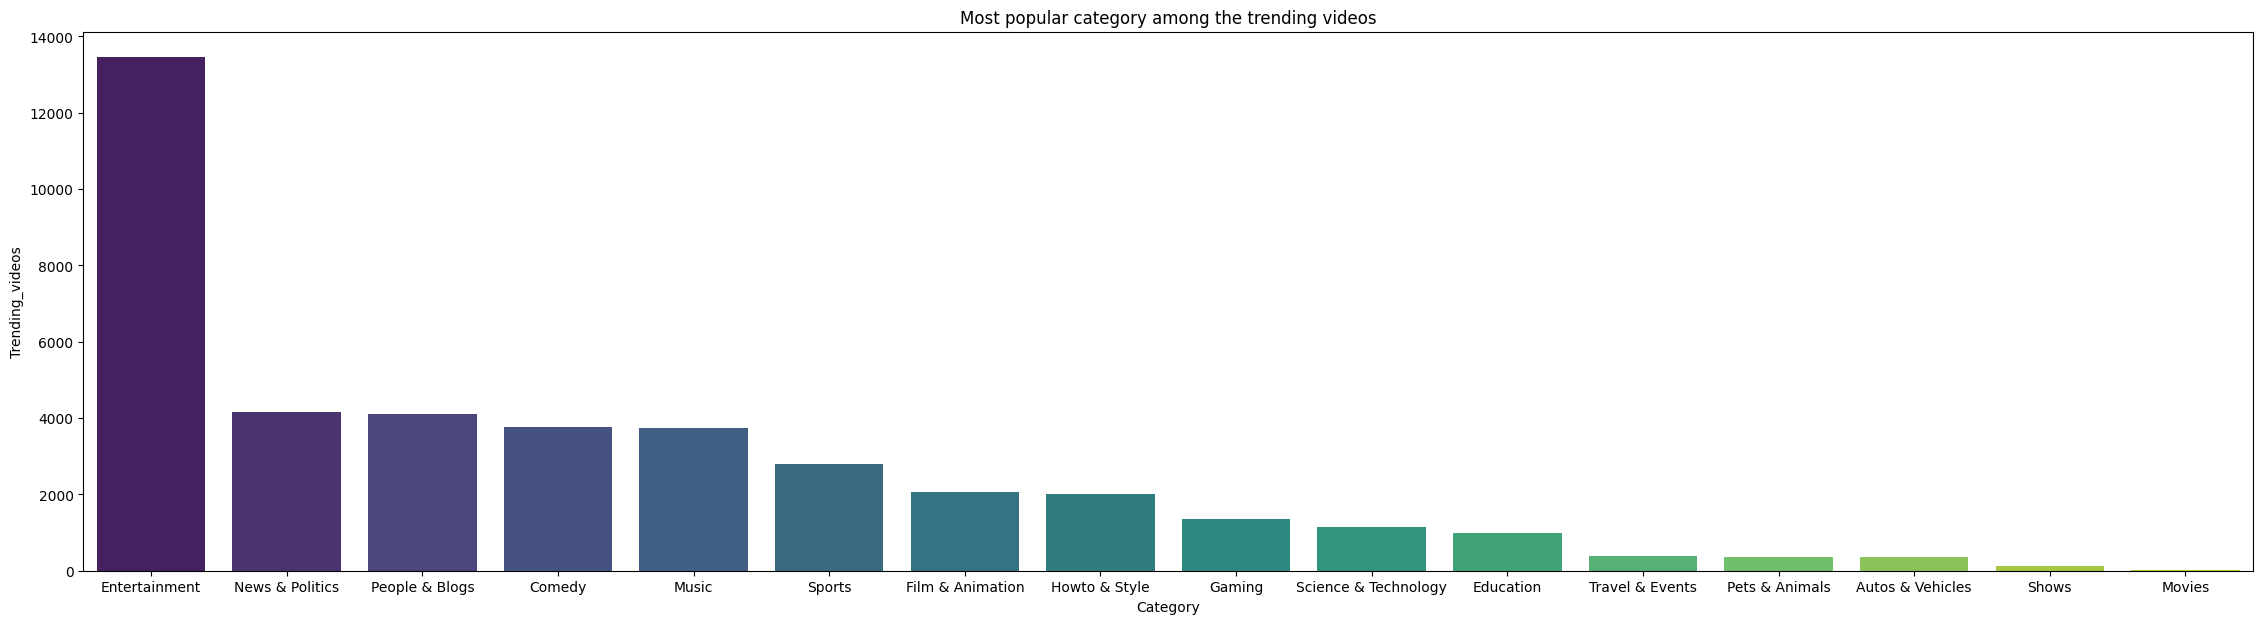

In [8]:
plt.figure(figsize=(28,7))
plt.title("Most popular category among the trending videos")
sns.barplot(x=category_counts['Category'],y=category_counts['Trending_videos'],palette='viridis',hue=category_counts['Category'],legend=False)

In [9]:
total_vids=category_counts['Trending_videos'].sum()
Entertainment_vids = 13451
percentage_share = Entertainment_vids/total_vids * 100
percentage_share


32.96248192712034

**Insight: Most Trending Categories on YouTube (Canada)**

From the chart above, it's clear that **Entertainment** dominates YouTube's trending section in Canada, with over **13,000 trending appearances**, making up approximately **32.96%** of all trending videos — nearly **1 in every 3**. 

After that categories like **News & Politics**, **People & Blogs**, and **Comedy** also have strong presence

Educational categories such as **Science & Technology**, **Education**, and **Travel & Events** trend far less often, suggesting either lower upload volume or narrower audience appeal.

Interestingly, categories like **Movies** and **Shows** appear very rarely.


In [17]:
avg_views = yt_data.groupby('category')['views'].mean().astype(int).sort_values( ascending=False)
avg_views

category
Music                   3532524
Movies                  2853415
Film & Animation        1426728
Science & Technology    1233844
Sports                  1075583
Entertainment           1016371
Comedy                   982888
Gaming                   923759
People & Blogs           786413
Howto & Style            782683
Pets & Animals           638461
Shows                    577012
Autos & Vehicles         566759
Education                536602
News & Politics          388220
Travel & Events          366701
Name: views, dtype: int32

In [11]:
avg_views = avg_views.reset_index()
avg_views.columns = ["category","avg_views"]
avg_views

,category,avg_views
0,Music,3532524
1,Movies,2853415
2,Film & Animation,1426728
3,Science & Technology,1233844
4,Sports,1075583
5,Entertainment,1016371
6,Comedy,982888
7,Gaming,923759
8,People & Blogs,786413
9,Howto & Style,782683


<Axes: title={'center': 'Average views by category'}, xlabel='category', ylabel='avg_views'>

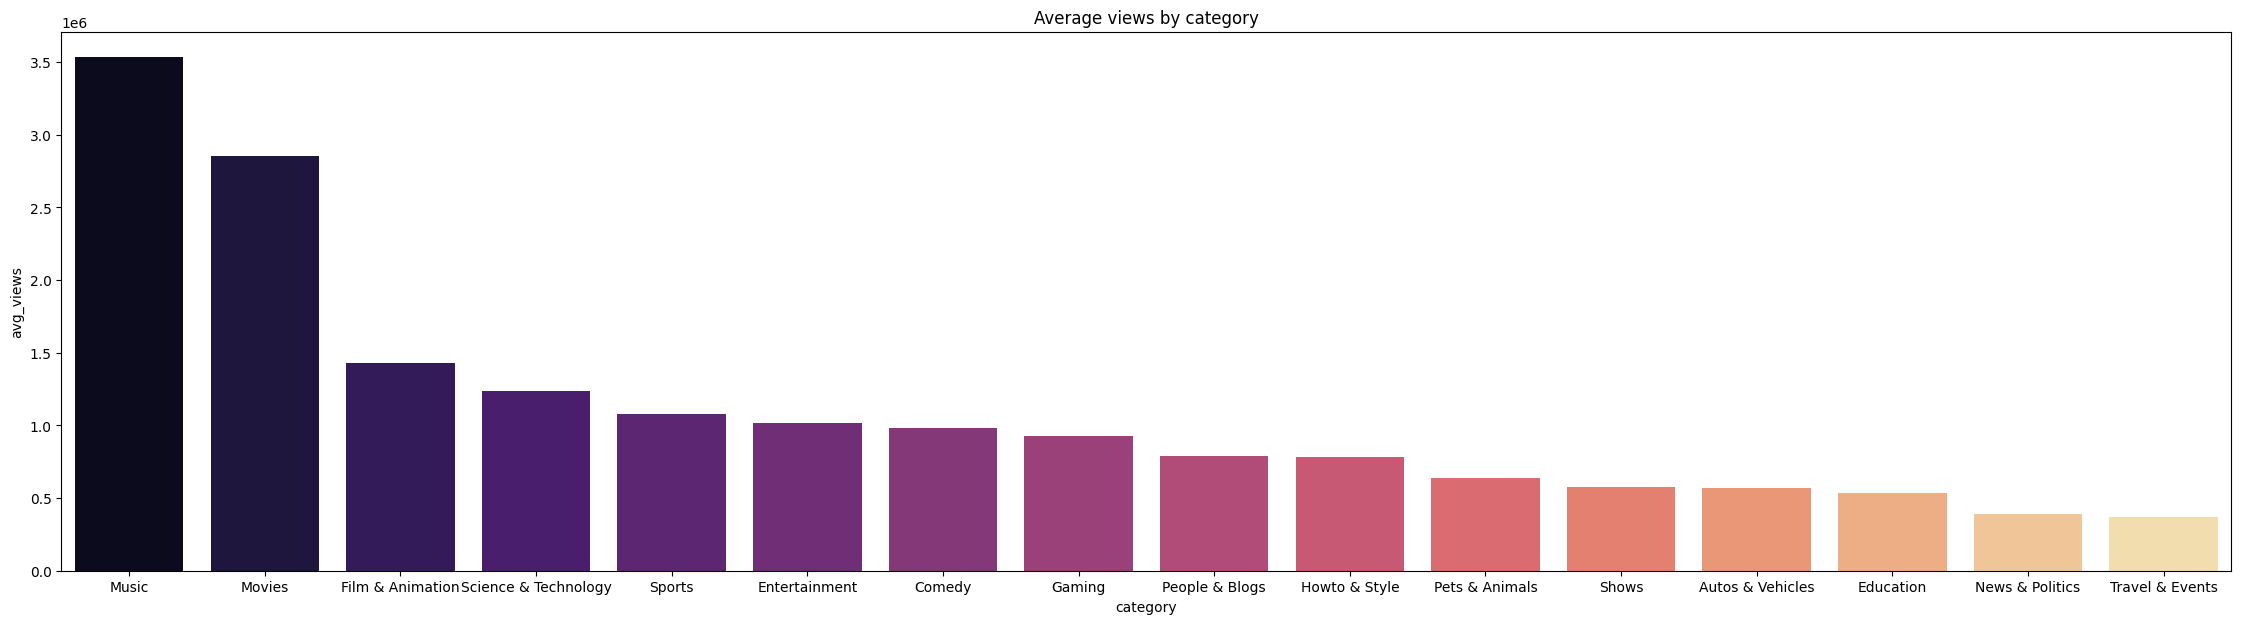

In [12]:
plt.figure(figsize=(28,7))
plt.title("Average views by category")
sns.barplot(x=avg_views['category'],y=avg_views['avg_views'],palette='magma',hue=avg_views['category'],legend=False)

 **Insight: Average Views per Video by Category**

From the chart above, it's evident that **Music** dominates in terms of average views, with each trending video gaining over **3.5 million views on average**. This is followed by **Movies** and **Film & Animation**, indicating strong audience engagement for globally appealing content.

**Entertainment** — which had the most trending videos — ranks **6th** in average views. This suggests that while they frequently go viral, individual Entertainment videos may not always perform exceptionally.

Other categories recieve comparitively less views possible because they dont have a stronger audience


In [13]:
yt_data['comments_disabled'].value_counts()

comments_disabled
False    40298
True       583
Name: count, dtype: int64

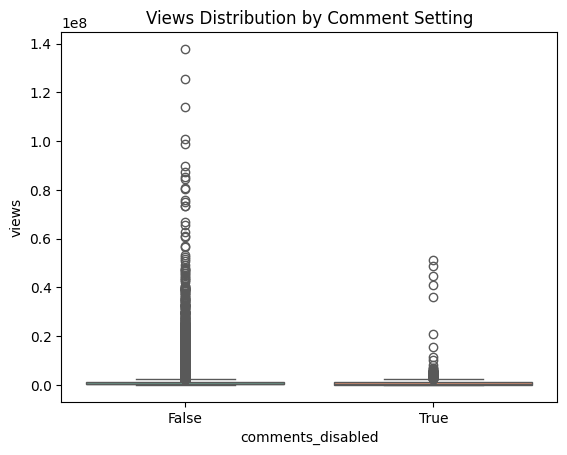

In [18]:
sns.boxplot(x='comments_disabled', y='views', data=yt_data, palette='Set2',hue='comments_disabled',legend=False)
plt.title('Views Distribution by Comment Setting')
plt.show()


Insight: Impact of Disabled Comments on Video Views

Our analysis suggests that **videos with disabled comments generally receive fewer views** on average compared to those with comments enabled. This trend is visible in the boxplot.

However, it's important to note that the number of videos with comments disabled in this dataset is **significantly smaller** (only 583 samples), making it statistically weaker to draw a firm conclusion.

**Conclusion:** While there’s a visible trend, the smaller sample size for disabled comments means we should treat this finding as suggestive but not definitive.


In [16]:
yt_data.groupby('category')['likes'].mean().sort_values(ascending=False).astype(int)


category
Music                   151285
Comedy                   51960
Movies                   42150
Gaming                   38487
Film & Animation         37767
Science & Technology     37068
Entertainment            28789
People & Blogs           25673
Howto & Style            25502
Pets & Animals           23931
Sports                   21330
Education                21162
Autos & Vehicles         13405
Travel & Events           9568
News & Politics           7863
Shows                     4752
Name: likes, dtype: int32

 **Insight: Average Likes per Video by Category**

The **Music** category stands out with an average of over **150,000 likes per video**, far surpassing every other category. This suggests that musical content has a **strong emotional and viral appeal**, likely due to fan-driven engagement.

Other categories such as **Comedy**, **Movies**, and **Gaming** also show strong average likes, indicating that **entertainment-based content tends to perform better in terms of audience approval**.

In contrast, categories like **News & Politics**, **Travel & Events**, and **Shows** receive the **lowest average likes**, possibly due to lower engagement or more passive consumption.

This reinforces that **high average views don’t always correlate with high average likes**, but **music consistently leads in both**.


## 📌 Final Summary

This project explored the **YouTube Trending Video Dataset (Canada)** to understand which types of content perform best.

### 🔍 Key Insights:
- 🎭 **Entertainment** has the most trending videos, but **Music** dominates in both **average views** and **likes**, indicating stronger engagement.
- 🚫 Videos with **disabled comments** tend to receive **lower views**, but the sample size is small, so the conclusion is suggestive, not definitive.
- 📊 Categories like **News & Politics**, **Education**, and **Travel & Events** have lower performance in terms of average views and likes.
- ❤️ **Likes** strongly favor **Music**, followed by **Comedy** and **Movies**, showing high emotional or fan-driven support.

### 🔍 What this suggests:
- **Engagement features (likes, comments)** likely help boost visibility.
- **Music and entertainment-related content** tends to trend and perform the best.
- Some categories may need better promotion or appeal to niche audiences.

.
